In [3]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image
from IPython.display import display, Math, Latex
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import requests
from tabulate import tabulate
with MPRester("Jqka7RaOKJvTC6iABC") as me:    
    
    # Téléchargement du fichier CIF
    # Structure for material id
    pars = CifParser("mp9368.cif")
    struct = pars.get_structures()[0]
    spg = SpacegroupAnalyzer(struct)

# Pics de diffraction

Cette tâche cherche à déterminer les 3 premiers pics du diffractogramme correspondant au RbTMS2, pour un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 ̊A. Analytiquement, on peut trouver la position des pics de diffraction à l’aide de la loi de Bragg:

$$2*d_{hkl}\sin\theta = \lambda$$
avec 
- $\lambda$ la longueur d'onde des rayons X utilisés, c'est-à-dire $\lambda=1.54060Å$
- $d_{hkl}$, la distance inter-planaire pour la famille de plans (hkl), donnée par la formule $d_{hkl} = \frac{2\pi}{|K|}$,
avec $K$, un vecteur du réseau réciproque, tel que $K = ha_1^*+ka_2^*+la_3^*$, $h,k,l \in Z$

## Calcul des 3 premiers pics du diffractogramme
Dans notre cas, nous utilisons la structure du matériau et le package "pymatgen.analysis.diffraction.xrd" pour calculer les indices (h,k,l) des 3 premiers pics.

In [7]:
c = XRDCalculator(wavelength = 'CuKa',symprec = 2.0, debye_waller_factors = None)
sp = c.get_pattern(struct)

# Calcul des 3 premiers pics de diffraction
pic1 = sp.hkls[0][0]
pic2 = sp.hkls[1][0]
pic3a = sp.hkls[2][0]
pic4 = sp.hkls[3][0]

# Affichage des résultats sous forme de tableau
table = [["Premier pic", pic1["hkl"], sp.d_hkls[0], sp.x[0], sp.y[0]],
         ["Deuxième pic", pic2["hkl"], sp.d_hkls[1], sp.x[1], sp.y[1]],
         ["Troisième pic", pic3a["hkl"], sp.d_hkls[2], sp.x[2], sp.y[2]],
        ]
print(tabulate(table, headers=["","Indices hkl", "Distance interplanaire", "Angle de diffraction", "Intensité du pic"], 
               stralign="center", numalign="center"),"\n")

                Indices hkl    Distance interplanaire    Angle de diffraction    Intensité du pic
-------------  -------------  ------------------------  ----------------------  ------------------
 Premier pic   (0, 0, 0, 3)           7.66954                  11.5379               35.5727
Deuxième pic   (0, 0, 0, 6)           3.83477                  23.1949               26.5508
Troisième pic  (1, 0, -1, 1)          3.44811                  25.8385               7.48886 



## Diffractogramme : représentation graphique des pics de diffraction
On affiche le diffractogramme chargé depuis la structure et on la compare avec le graphe fourni par Materials Project.

On retrouve ces 3 pics sur la figure suivante :


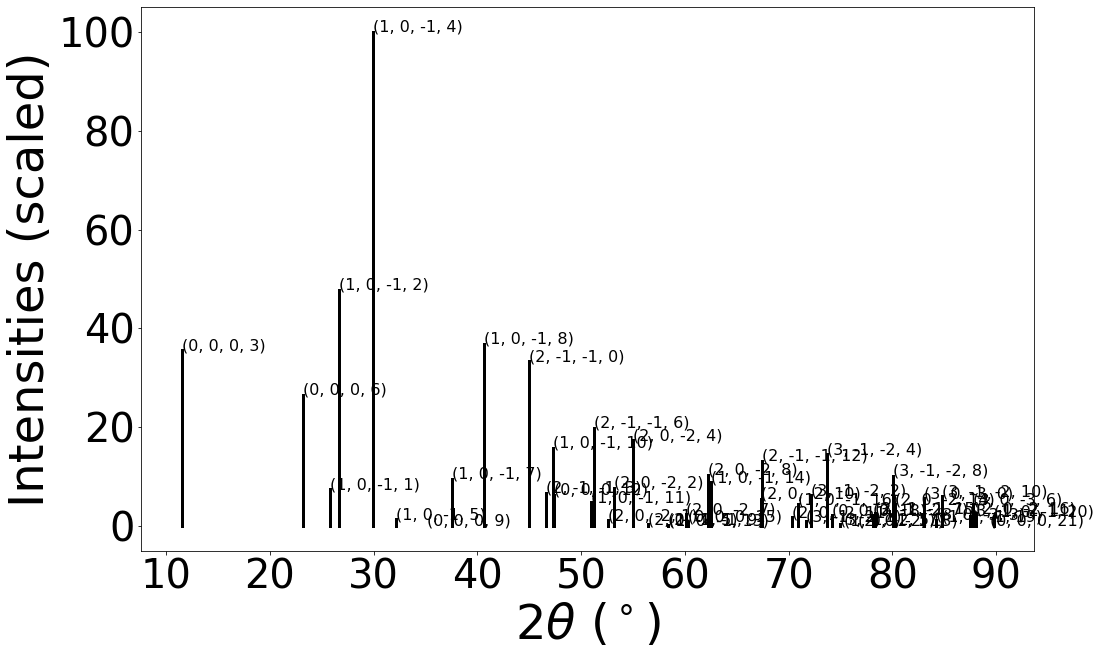

None
La figure est similaire à celle retrouvée sur Materials project :


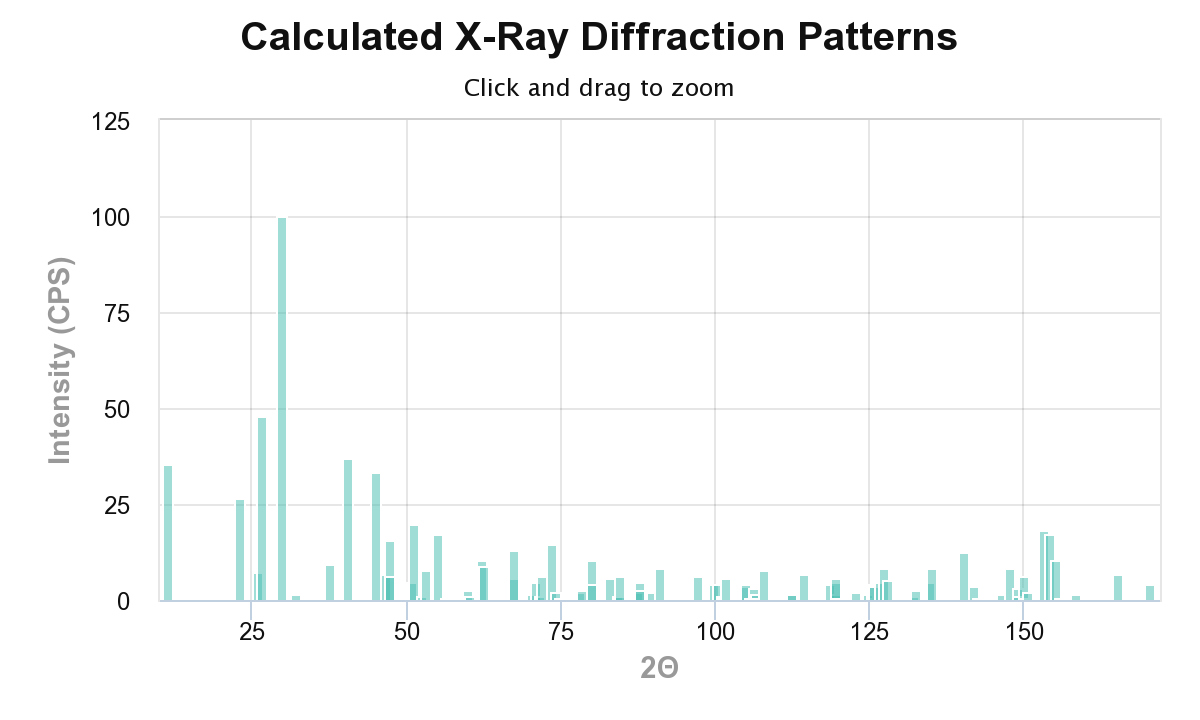

In [8]:
# Graphe des pics de diffraction
diff = Image(filename='xray_diff_pattern.png') # Graphe disponible sur Materials Project
print("On retrouve ces 3 pics sur la figure suivante :")
print(c.show_plot(struct))
print("La figure est similaire à celle retrouvée sur Materials project :")
display(diff)